In [1]:
import numpy as np
import pandas as pd
import h5py as h5
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity

In [2]:
!ls ../h5

scalar_VBFH_WW2l2nu.h5 scalar_Z750.h5         vector_Z1250.h5
scalar_VBFH_ZZ4l.h5    scalar_ggH_WW2l2nu.h5  vector_Z400.h5
scalar_Z1000.h5        scalar_ggH_ZZ4l.h5     vector_Z500.h5
scalar_Z1250.h5        vector_VBFH_WW2l2nu.h5 vector_Z750.h5
scalar_Z400.h5         vector_VBFH_ZZ4l.h5    vector_ggH_WW2l2nu.h5
scalar_Z500.h5         vector_Z1000.h5        vector_ggH_ZZ4l.h5


In [3]:
def file_to_pd(filename, label):
    hdf5_file = h5.File("../h5/scalar_"+filename, "r")
    dataset = hdf5_file["vector_data"]
    df = pd.DataFrame()
    for i, name in enumerate(["met_et","jet_n","lep_n","jet_m","alljet_n"]):
        df[name] = pd.Series(np.ravel(dataset[i]))
    hdf5_file = h5.File("../h5/vector_"+filename, "r")
    dataset = hdf5_file["vector_data"]
    for n, name in enumerate(["lep_pt", "lep_eta", "lep_phi", "lep_E", "lep_charge", "lep_ptcone30", "jet_pt", "jet_eta", "jet_phi", "jet_E"]):
        for i in range(dataset.shape[2]):
            df[name+'_'+str(i)] = pd.Series(dataset[n,:,i])
    df["label"] = pd.Series(np.ones(dataset.shape[1])*label)
    return df
    

In [4]:
!ls ../h5

scalar_VBFH_WW2l2nu.h5 scalar_Z750.h5         vector_Z1250.h5
scalar_VBFH_ZZ4l.h5    scalar_ggH_WW2l2nu.h5  vector_Z400.h5
scalar_Z1000.h5        scalar_ggH_ZZ4l.h5     vector_Z500.h5
scalar_Z1250.h5        vector_VBFH_WW2l2nu.h5 vector_Z750.h5
scalar_Z400.h5         vector_VBFH_ZZ4l.h5    vector_ggH_WW2l2nu.h5
scalar_Z500.h5         vector_Z1000.h5        vector_ggH_ZZ4l.h5


In [5]:
df_gg_4l  = file_to_pd("ggH_ZZ4l.h5",0)
df_VBF_4l = file_to_pd("VBFH_ZZ4l.h5",0)
df_gg_2l  = file_to_pd("ggH_WW2l2nu.h5",1)
df_VBF_2l = file_to_pd("VBFH_WW2l2nu.h5",1)
df_400    = file_to_pd("Z400.h5",2)
df_500    = file_to_pd("Z500.h5",2)
df_750    = file_to_pd("Z750.h5",2)
df_1000   = file_to_pd("Z1000.h5",2)
df_1250   = file_to_pd("Z1250.h5",2)


In [6]:
df = pd.concat([df_gg_4l, df_VBF_4l, df_gg_2l, df_VBF_2l, df_400,df_500, df_750, df_1000, df_1250],ignore_index=True)
df['label'] = df['label'].astype(int)

In [7]:
df.tail()

,met_et,jet_n,lep_n,jet_m,alljet_n,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_pt_4,...,jet_phi_7,jet_E_0,jet_E_1,jet_E_2,jet_E_3,jet_E_4,jet_E_5,jet_E_6,jet_E_7,label
520701,92951.218750,4.0,1.0,42412.199219,4.0,165499.265625,0.0,0.0,0.0,0.0,...,0.0,270985.15625,237845.078125,268626.500000,82052.937500,0.000000,0.0,0.0,0.0,2
520702,310283.187500,2.0,1.0,39065.558594,2.0,86297.875000,0.0,0.0,0.0,0.0,...,0.0,354956.25000,91829.460938,0.000000,0.000000,0.000000,0.0,0.0,0.0,2
520703,271809.375000,3.0,1.0,69972.296875,3.0,108681.171875,0.0,0.0,0.0,0.0,...,0.0,434973.81250,55515.410156,50142.058594,0.000000,0.000000,0.0,0.0,0.0,2
520704,97783.765625,3.0,1.0,96519.640625,3.0,341025.125000,0.0,0.0,0.0,0.0,...,0.0,793118.37500,308491.156250,148576.515625,0.000000,0.000000,0.0,0.0,0.0,2
520705,324058.812500,4.0,1.0,20114.412109,5.0,106327.140625,0.0,0.0,0.0,0.0,...,0.0,216939.53125,167806.734375,97575.296875,99329.054688,28191.970703,0.0,0.0,0.0,2


In [11]:
!ls ../h5

scalar_VBFH_WW2l2nu.h5	scalar_Z750.h5		vector_Z1250.h5
scalar_VBFH_ZZ4l.h5	scalar_ggH_WW2l2nu.h5	vector_Z400.h5
scalar_Z1000.h5		scalar_ggH_ZZ4l.h5	vector_Z500.h5
scalar_Z1250.h5		vector_VBFH_WW2l2nu.h5	vector_Z750.h5
scalar_Z400.h5		vector_VBFH_ZZ4l.h5	vector_ggH_WW2l2nu.h5
scalar_Z500.h5		vector_Z1000.h5		vector_ggH_ZZ4l.h5


In [6]:
!ls ..

Plots      bin        h5         lib        pickle_pd  share
README.md  etc        include    notebooks  pyvenv.cfg


In [3]:
!rm -r ../pd

In [5]:
!mkdir ../pickle_pd

In [8]:
features = list(df)
features.remove("label")

In [11]:
features_new = ['met_et',
 'jet_n',
 'lep_n',
 'jet_m',
 'alljet_n',
 'lep_pt_0',
 'lep_pt_1',
 'lep_pt_2',
 'lep_pt_3',
 'lep_pt_4',
 'lep_pt_5',
 'lep_pt_6',
 'lep_pt_7',
 'lep_eta_0',
 'lep_eta_1',
 'lep_eta_2',
 'lep_eta_3',
 'lep_eta_4',
 'lep_eta_5',
 'lep_eta_6',
 'lep_eta_7',
 'lep_phi_0',
 'lep_phi_1',
 'lep_phi_2',
 'lep_phi_3',
 'lep_phi_4',
 'lep_phi_5',
 'lep_phi_6',
 'lep_phi_7',
 'lep_E_0',
 'lep_E_1',
 'lep_E_2',
 'lep_E_3',
 'lep_E_4',
 'lep_E_5',
 'lep_E_6',
 'lep_E_7',
 'lep_charge_0',
 'lep_charge_1',
 'lep_charge_2',
 'lep_charge_3',
 'lep_charge_4',
 'lep_charge_5',
 'lep_charge_6',
 'lep_charge_7',
 'lep_ptcone30_0',
 'lep_ptcone30_1',
 'lep_ptcone30_2',
 'lep_ptcone30_3',
 'lep_ptcone30_4',
 'lep_ptcone30_5',
 'lep_ptcone30_6',
 'lep_ptcone30_7',
 'jet_pt_0',
 'jet_pt_1',
 'jet_pt_2',
 'jet_pt_3',
 'jet_pt_4',
 'jet_pt_5',
 'jet_pt_6',
 'jet_pt_7',
 'jet_eta_0',
 'jet_eta_1',
 'jet_eta_2',
 'jet_eta_3',
 'jet_eta_4',
 'jet_eta_5',
 'jet_eta_6',
 'jet_eta_7',
 'jet_phi_0',
 'jet_phi_1',
 'jet_phi_2',
 'jet_phi_3',
 'jet_phi_4',
 'jet_phi_5',
 'jet_phi_6',
 'jet_phi_7',
 'jet_E_0',
 'jet_E_1',
 'jet_E_2',
 'jet_E_3',
 'jet_E_4',
 'jet_E_5',
 'jet_E_6',
 'jet_E_7']

### We should probably try to save every Plot individually to better sift through the individual features

/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid v

/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/niklas/.local/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid v

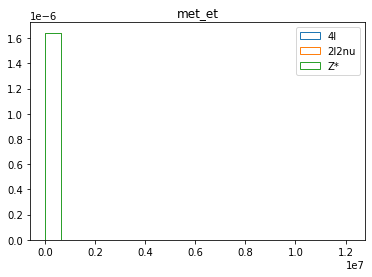

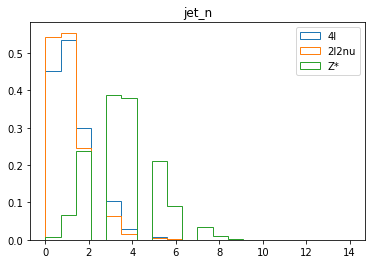

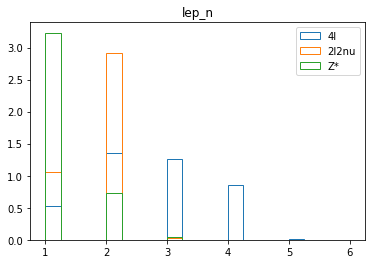

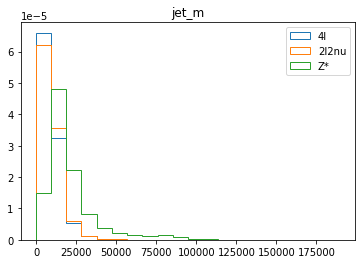

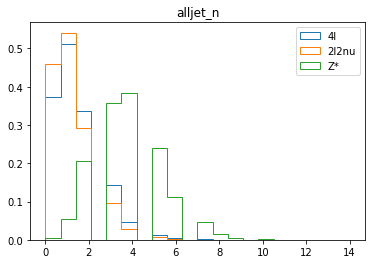

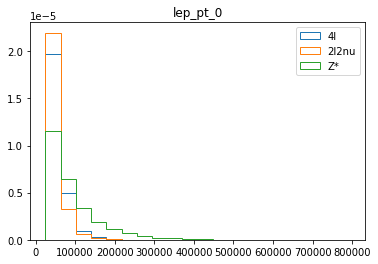

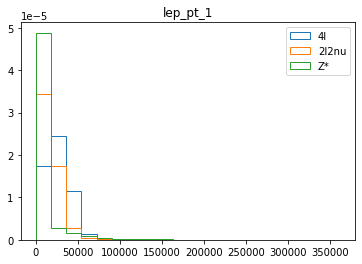

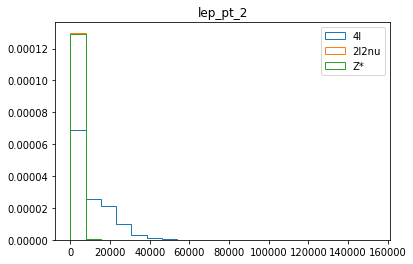

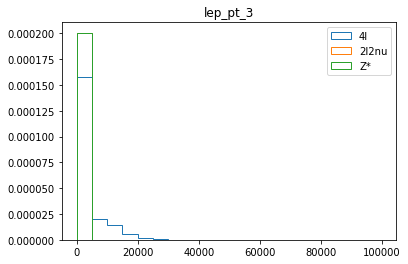

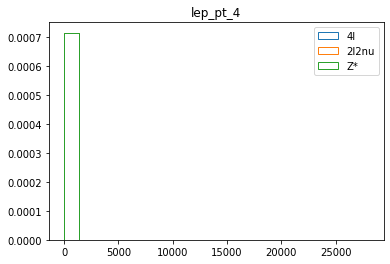

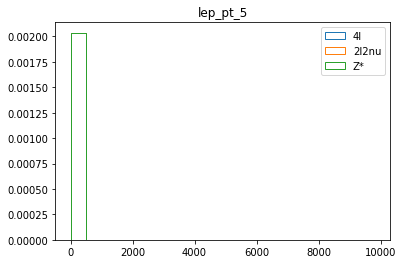

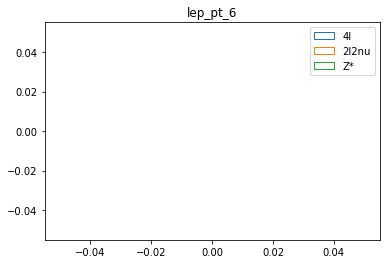

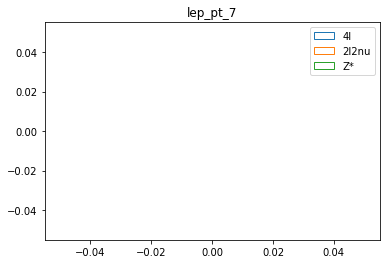

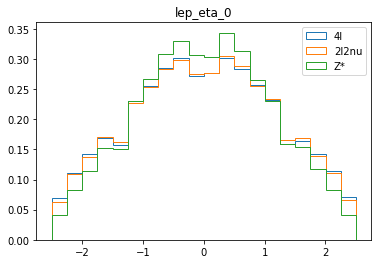

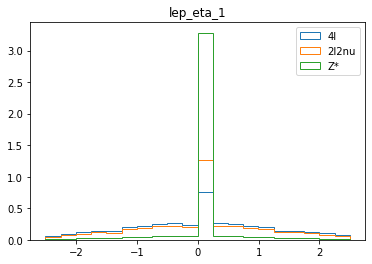

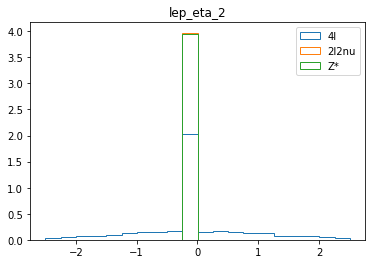

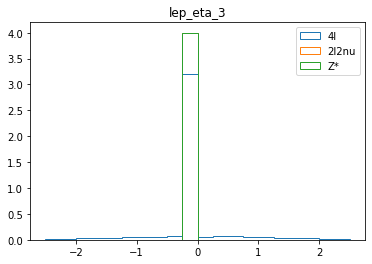

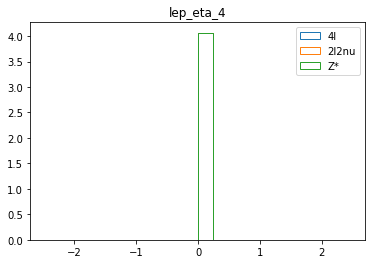

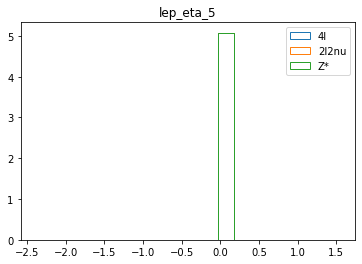

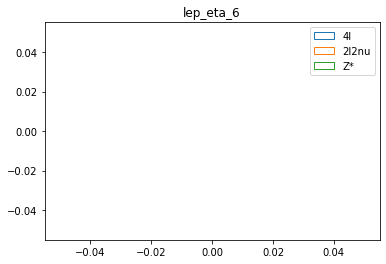

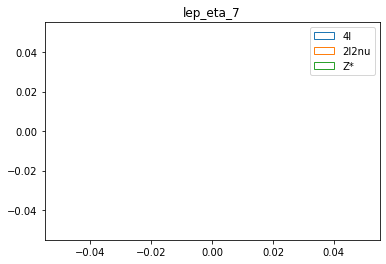

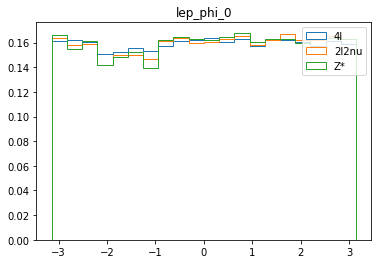

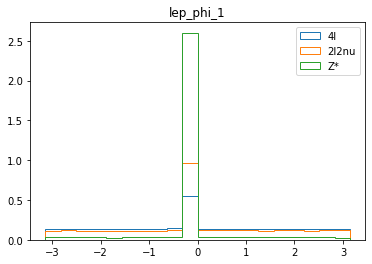

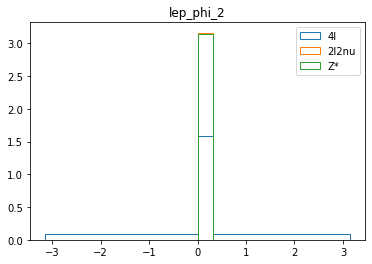

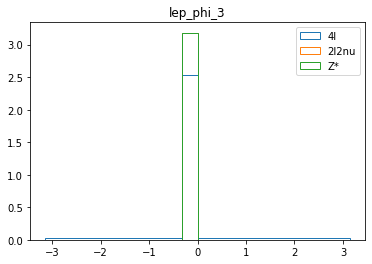

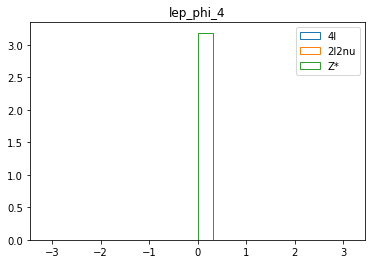

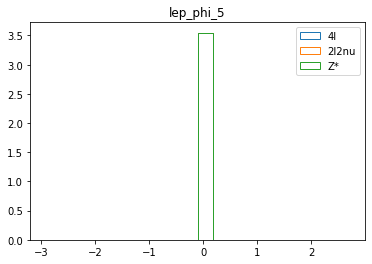

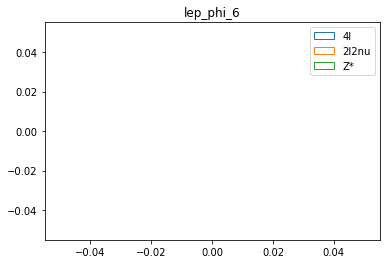

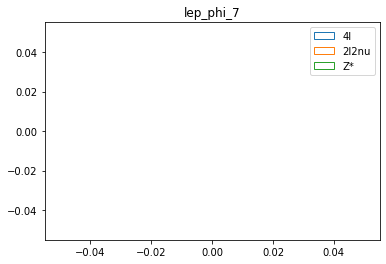

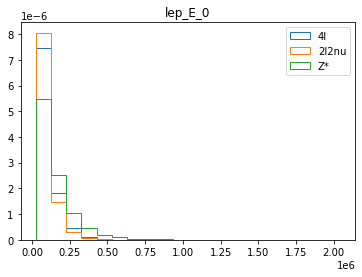

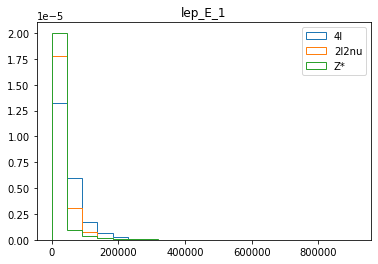

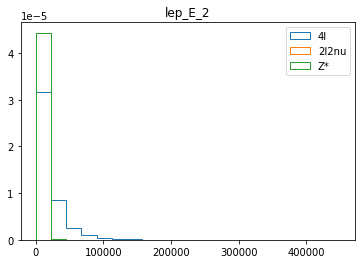

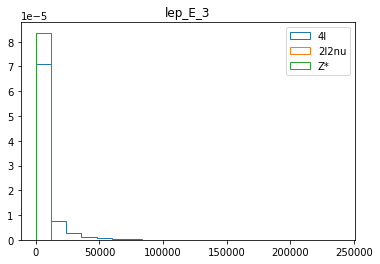

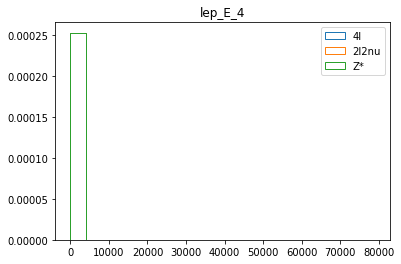

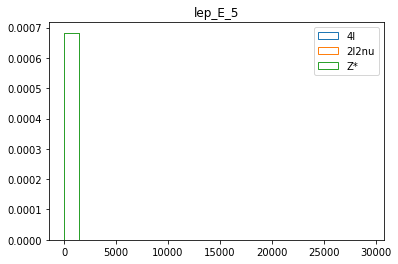

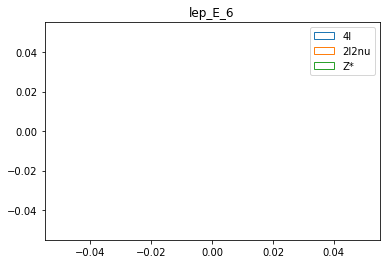

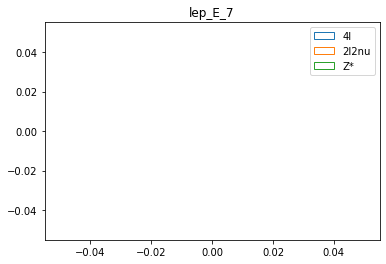

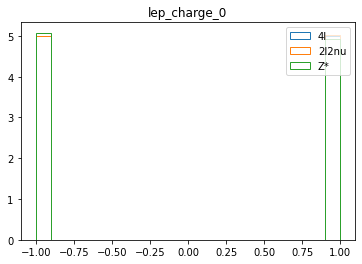

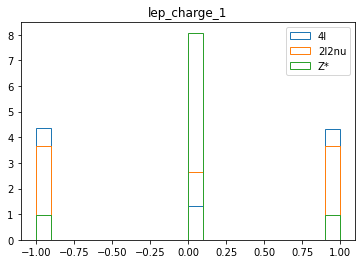

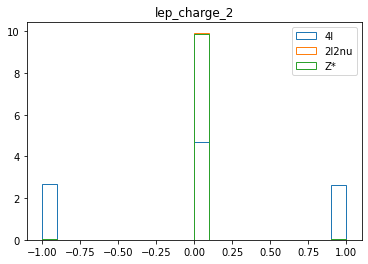

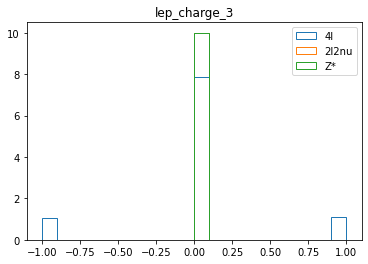

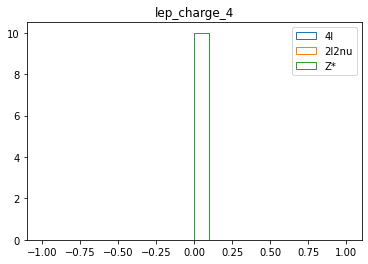

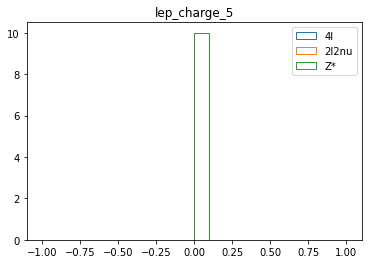

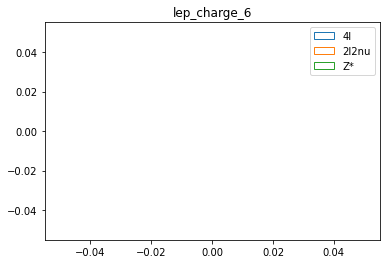

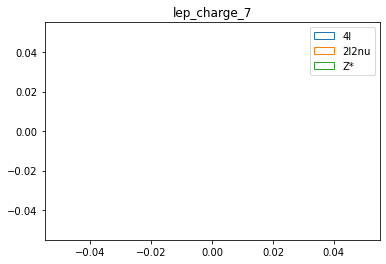

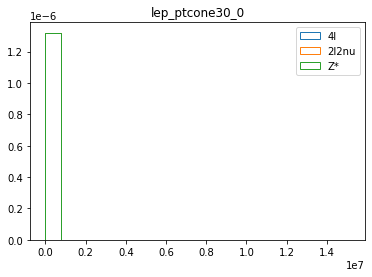

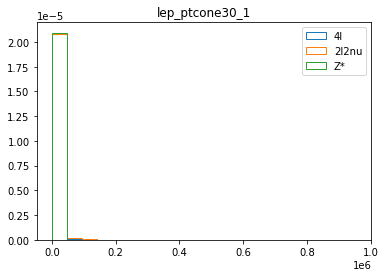

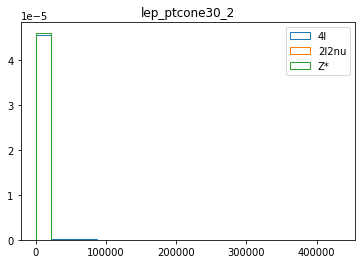

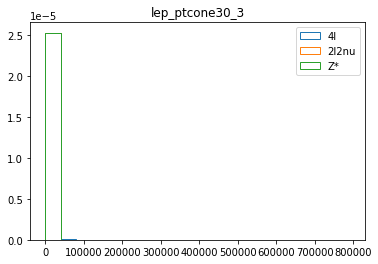

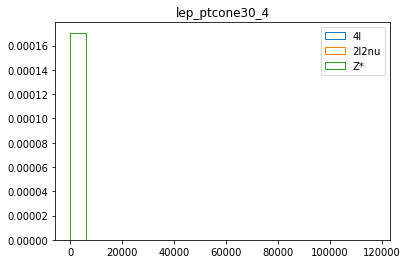

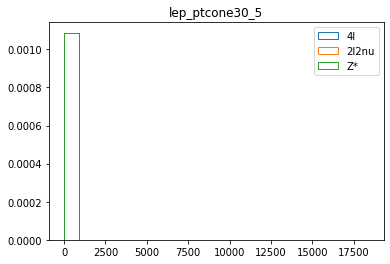

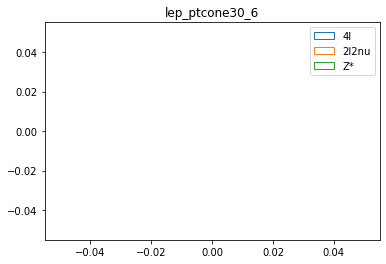

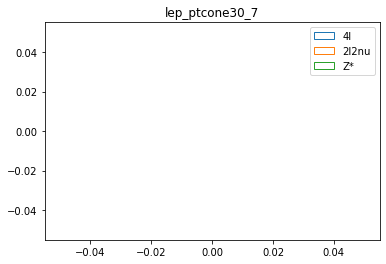

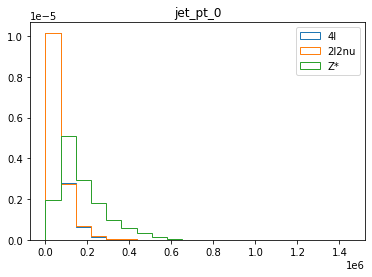

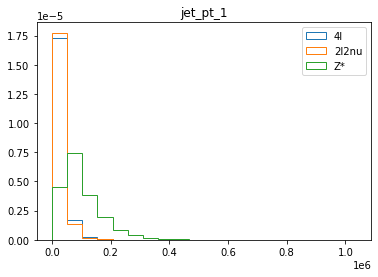

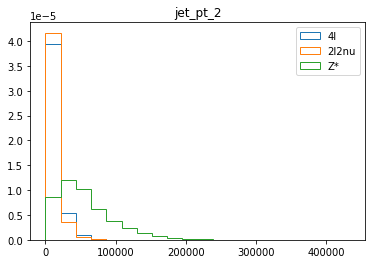

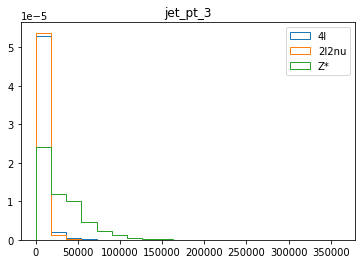

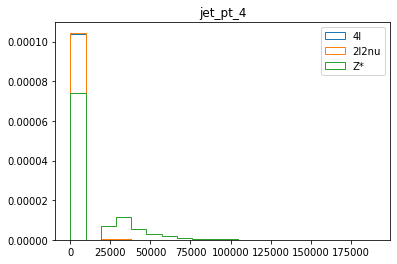

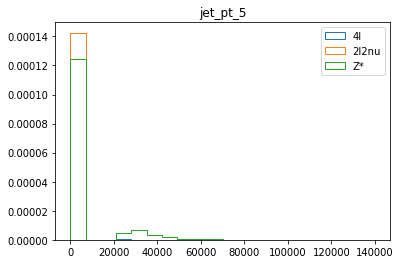

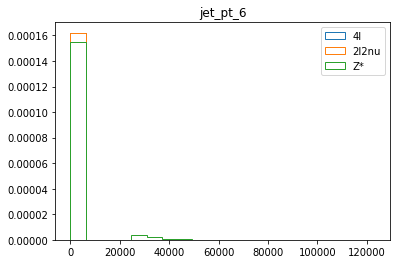

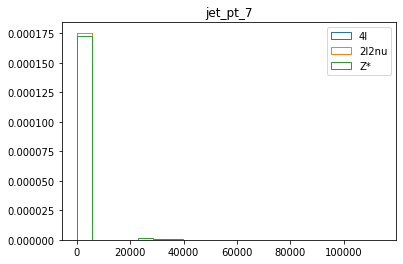

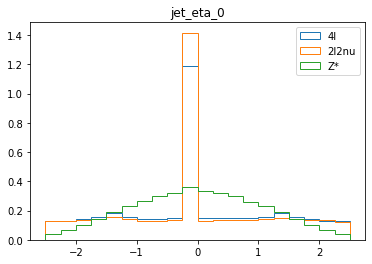

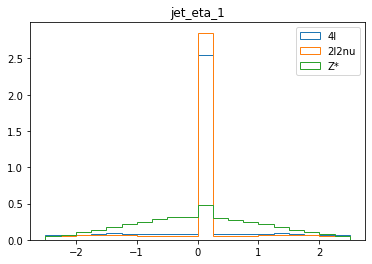

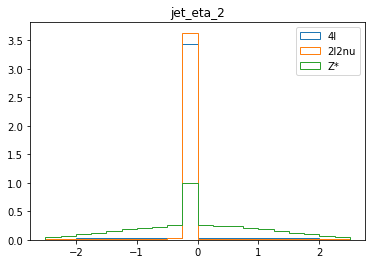

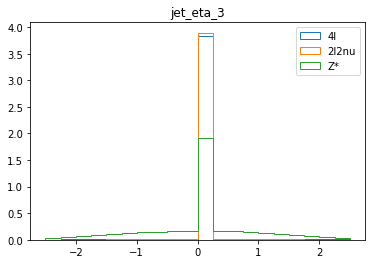

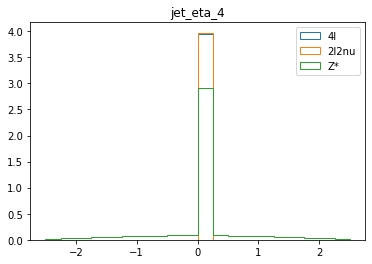

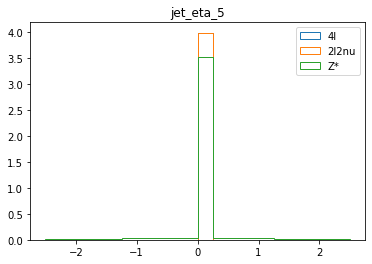

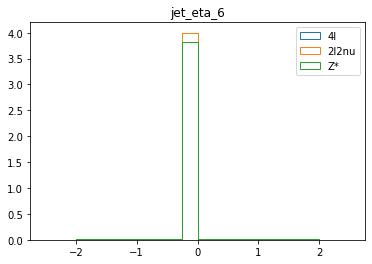

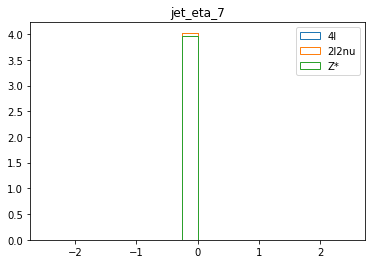

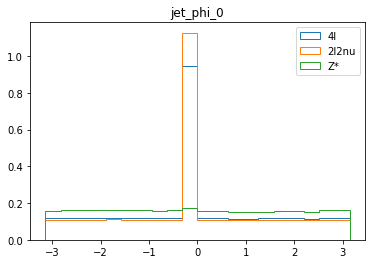

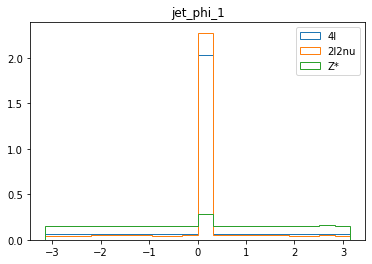

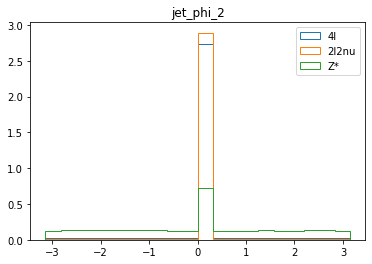

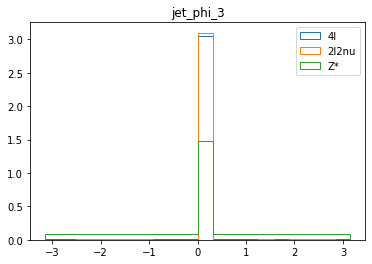

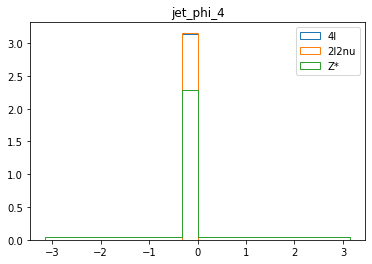

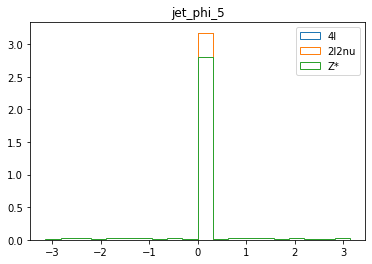

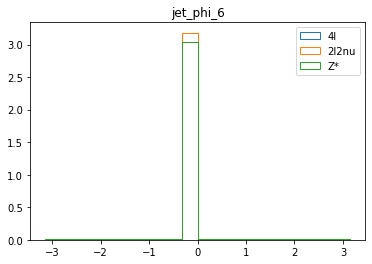

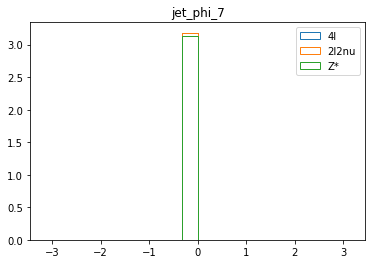

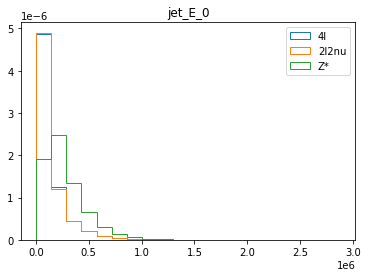

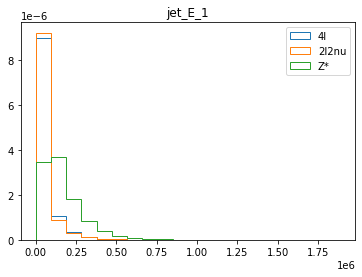

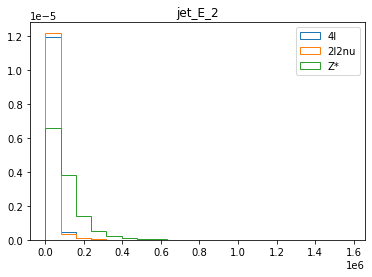

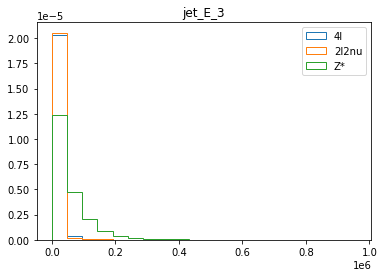

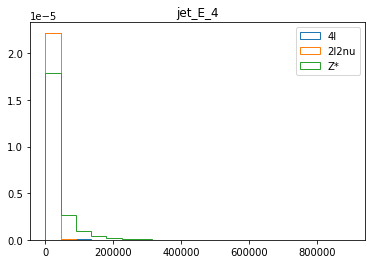

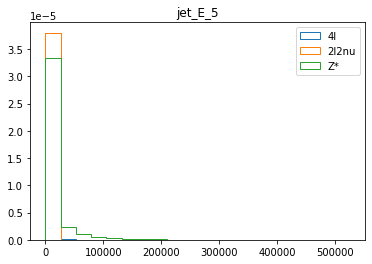

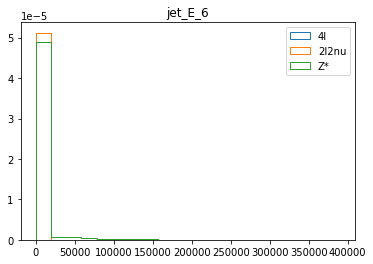

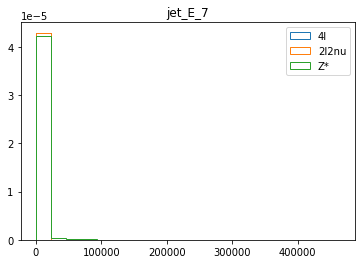

In [25]:
labels = df['label'].unique()
num_bins = 20
for i, feature in enumerate(features):
    min_value = df[feature].min()
    max_value = df[feature].max()
    bin_edges = np.linspace(min_value, max_value, num_bins + 1)
    plt.figure()
    for label in labels:
        data = df[df['label'] == label][feature]
        plt.hist(data, density=True, bins=bin_edges, label=label, histtype='step')
        plt.title(feature)
        L=plt.legend()
    L.get_texts()[0].set_text('4l')
    L.get_texts()[1].set_text('2l2nu')
    L.get_texts()[2].set_text('Z*')
    plt.savefig("../Plots/Feature_distributions/1/"+feature+".png")
    #plt.legend([0,1,2], ("4l", "2l2nu", "Z*"))

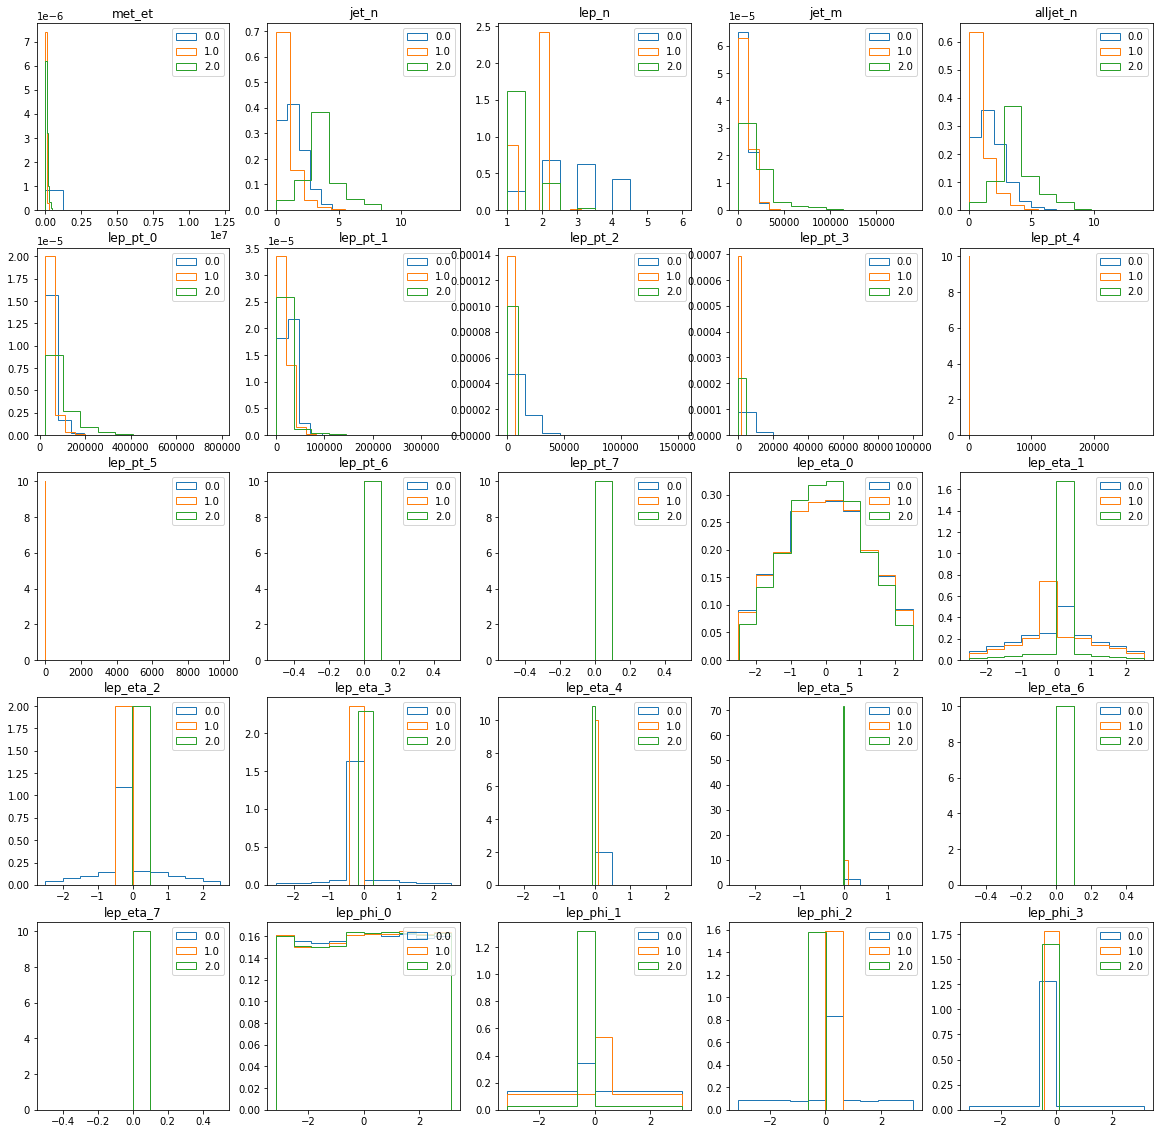

In [24]:
fig, ax = plt.subplots(5,5, figsize=(20,20))

#features = df.columns  # Assuming 'df' is your DataFrame object
labels = df['label'].unique()  # Assuming 'label' is the column containing the labels

for i, feature in enumerate(features[0:25]):
    for label in labels:
        data = df[df['label'] == label][feature]
        ax.flat[i].hist(data, density=True, label=label, histtype='step')
        ax.flat[i].set_title(feature)

    ax.flat[i].legend()  # Add a legend to differentiate between different labels